In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

In [17]:
PASSBANDS = {"u":0, "g":1, "r":2, "i":3, "z":4, "y":5}

def get_lcs(raw_df: pd.DataFrame, passband: str) -> list[dict, dict]:

    passband_df = raw_df[raw_df['passband']==PASSBANDS[passband]]
    lcs = {}
    mjds = {}
    
    unique_objid = np.unique(passband_df['object_id'])
    
    for object_id in unique_objid:
        
        id_mask = object_id == passband_df['object_id']

        lcs[f"{object_id}"] = passband_df.loc[id_mask, "flux"].to_numpy()
        
        mjds[f"{object_id}"] = passband_df.loc[id_mask, "mjd"].to_numpy()

    return lcs, mjds


In [2]:
# Load data
data_directory = "/home/edgar/astropology/data/"
band = "u_band"

bd_neg = np.load(
    f"{data_directory}/bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)
wd_neg = np.load(
    f"{data_directory}/wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)
bd = np.load(
    f"{data_directory}/bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
)
wd = np.load(
    f"{data_directory}/bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
)

n_series = wd.shape[0]

In [54]:
lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
    index_col="object_id"
)
# load map from idx to objectid
idx_id_bd_neg = np.load(
    f"{data_directory}/objid_bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r",
    
).astype(int)

idx_id_wd_neg = np.load(
    f"{data_directory}/objid_wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
).astype(int)

idx_id_bd = np.load(
    f"{data_directory}/objid_bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
).astype(int)

idx_id_wd = np.load(
    f"{data_directory}/objid_bottleneck_series_7848_norm_mean_{band}.npy",
    mmap_mode="r"
).astype(int)

# Explore distribution of mean distance

In [3]:
bd_neg_score = np.nanmean(bd_neg, axis=1)
bd_neg_score *= 1/np.nanmax(bd_neg_score)

bd_score = np.nanmean(bd, axis=1)
bd_score *= 1/np.nanmax(bd_score)

wd_neg_score = np.nanmean(wd_neg, axis=1)
wd_neg_score *= 1/np.nanmax(wd_neg_score)

wd_score = np.nanmean(wd, axis=1)
wd_score *= 1/np.nanmax(wd_score)

In [4]:
quantiles = [0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

Wasserstein distance

In [5]:
q_wd_scores = np.quantile(wd_score, q=quantiles)
q_wd_neg_scores = np.quantile(wd_neg_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"wdist: {int(q*100)}% -> {q_wd_scores[idx]:.4E}")

for idx, q in enumerate(quantiles):

    print(f"wdist (neg flux): {int(q*100)}% -> {q_wd_neg_scores[idx]:.4e}")

wdist: 25% -> 1.2866E-04
wdist: 50% -> 1.2866E-04
wdist: 75% -> 1.2866E-04
wdist: 80% -> 1.2866E-04
wdist: 90% -> 1.2867E-04
wdist: 95% -> 1.2873E-04
wdist: 99% -> 1.2990E-04
wdist (neg flux): 25% -> 1.2858e-04
wdist (neg flux): 50% -> 1.2858e-04
wdist (neg flux): 75% -> 1.2858e-04
wdist (neg flux): 80% -> 1.2858e-04
wdist (neg flux): 90% -> 1.2859e-04
wdist (neg flux): 95% -> 1.2866e-04
wdist (neg flux): 99% -> 1.3053e-04


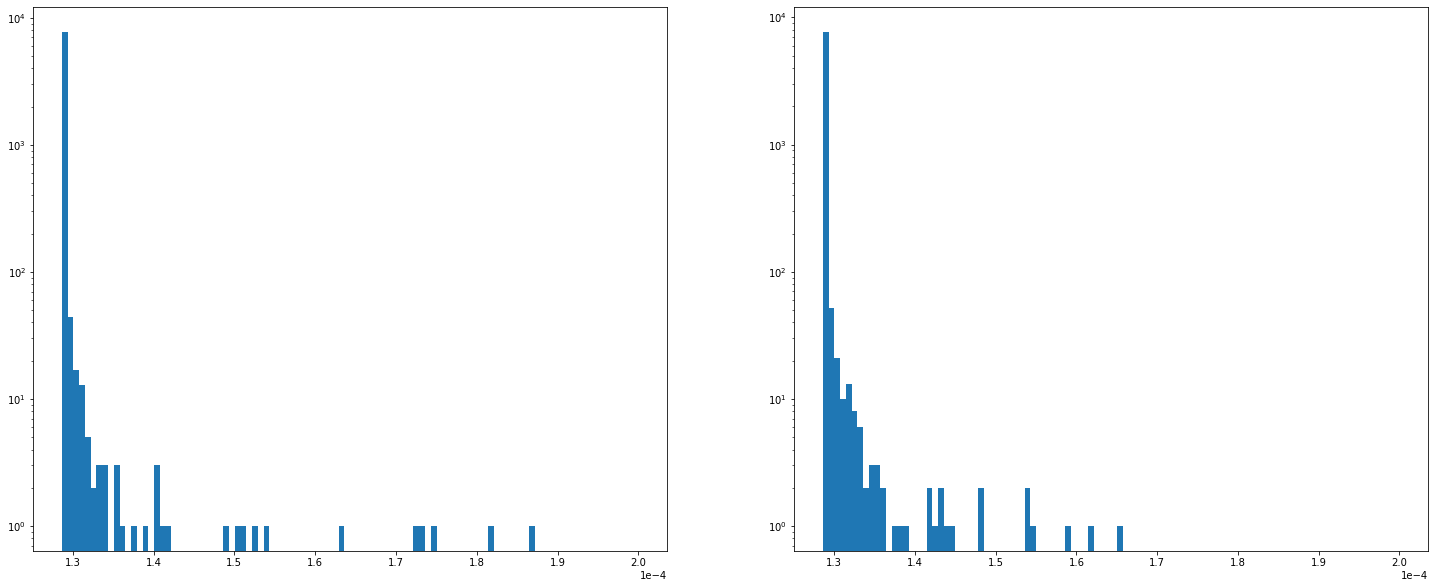

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

max = 2E-4
_ = axs[0].hist(
    wd_score, bins=100, range=(np.nanmin(wd_score), max)
)

_ = axs[1].hist(
    wd_neg_score, bins=100, range=(np.nanmin(wd_neg_score), max)
)

for ax in axs:
    # ax.set_xscale("log")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
    ax.set_yscale("log")

Bottleneck distance

In [7]:
q_bd_scores = np.quantile(bd_score, q=quantiles)
q_bd_neg_scores = np.quantile(bd_neg_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"bdist: {int(q*100)}% -> {q_bd_scores[idx]:.4e}")

for idx, q in enumerate(quantiles):

    print(f"bdist (neg flux): {int(q*100)}% -> {q_bd_neg_scores[idx]:.4e}")

bdist: 25% -> 1.2866e-04
bdist: 50% -> 1.2866e-04
bdist: 75% -> 1.2866e-04
bdist: 80% -> 1.2866e-04
bdist: 90% -> 1.2867e-04
bdist: 95% -> 1.2873e-04
bdist: 99% -> 1.2990e-04
bdist (neg flux): 25% -> 1.2868e-04
bdist (neg flux): 50% -> 1.2868e-04
bdist (neg flux): 75% -> 1.2868e-04
bdist (neg flux): 80% -> 1.2868e-04
bdist (neg flux): 90% -> 1.2870e-04
bdist (neg flux): 95% -> 1.2876e-04
bdist (neg flux): 99% -> 1.2989e-04


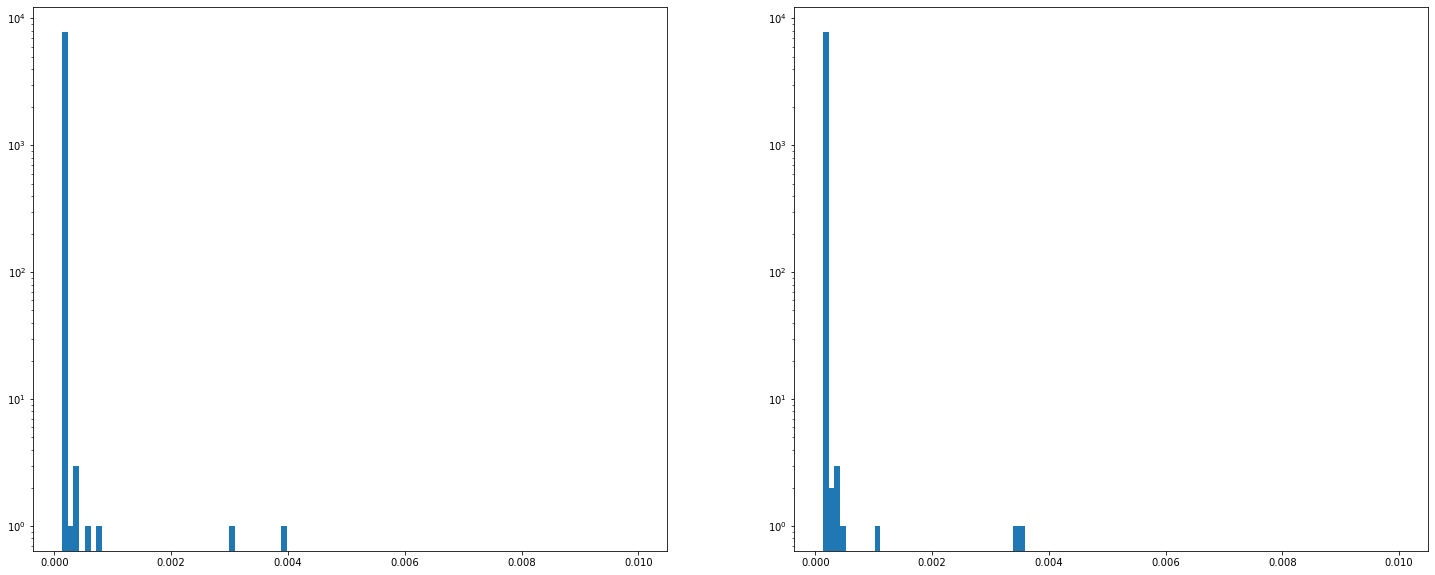

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 10))

max = 1e-2
_ = axs[0].hist(
    bd_score, bins=100, range=(np.nanmin(bd_score), max)
)

_ = axs[1].hist(
    bd_neg_score, bins=100, range=(np.nanmin(bd_neg_score), max)
)

for ax in axs:
    # ax.set_xscale("log")
    ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
    ax.set_yscale("log")

# Explore anomalies and compare

In [24]:
u_lcs, u_mjds = get_lcs(raw_df=lcs, passband="u")
# plt.scatter(u_mjds["615"], u_lcs["615"])

In [26]:
wd_idx = np.argsort(wd_score)
wd_neg_idx = np.argsort(wd_neg_score)
bd_idx = np.argsort(wd_score)
bd_neg_idx = np.argsort(wd_neg_score)

Wasserstein vs Bottleneck

In [39]:
def rank_to_object_id(rank, score, idx_objid):

    score_arg_sort = np.argsort(score)
    
    idx_lc = score_arg_sort[rank]

    id_mask = idx_objid[:, 0] == idx_lc

    object_id = idx_id_wd_neg[id_mask, 1][0]

    return object_id

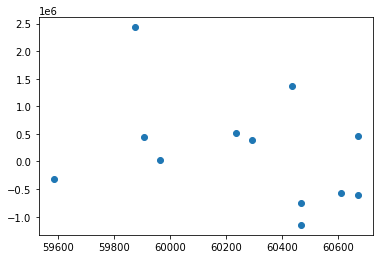

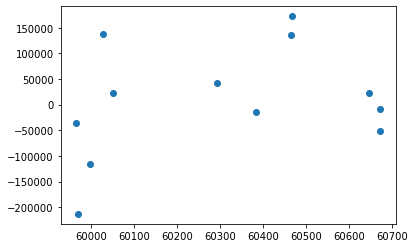

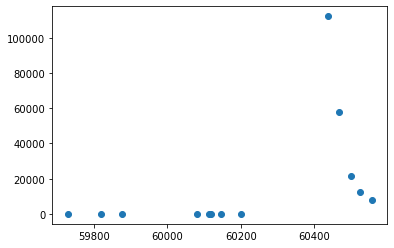

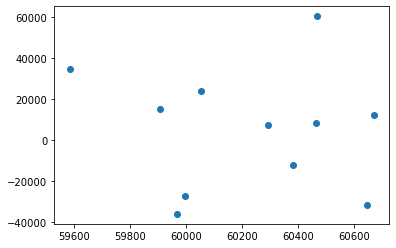

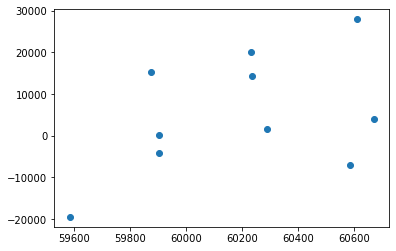

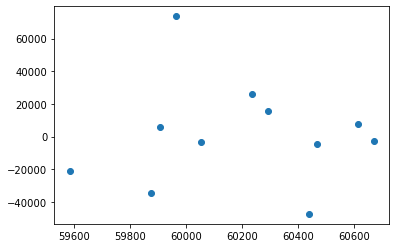

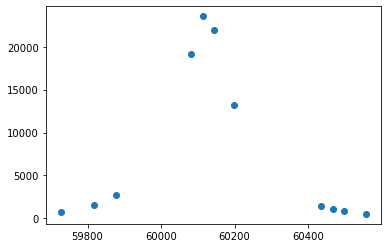

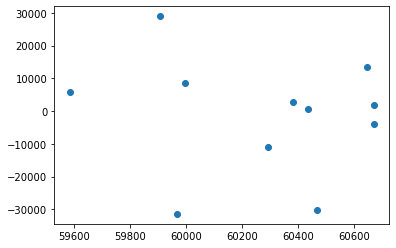

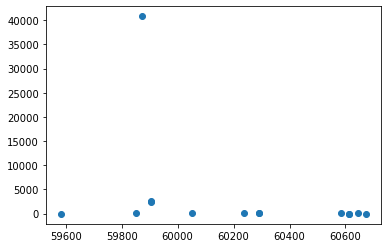

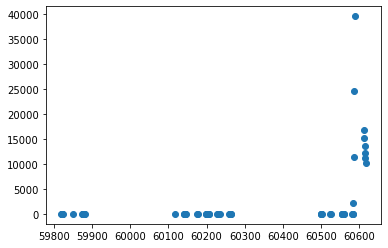

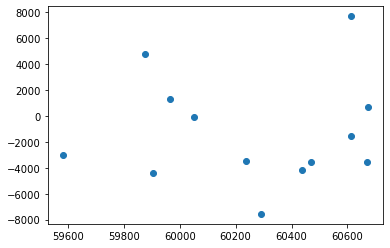

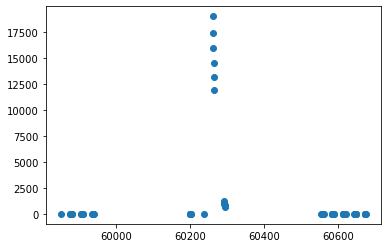

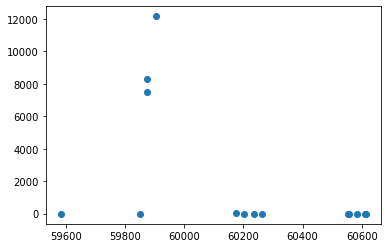

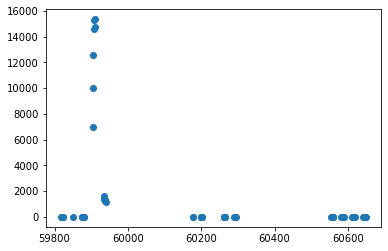

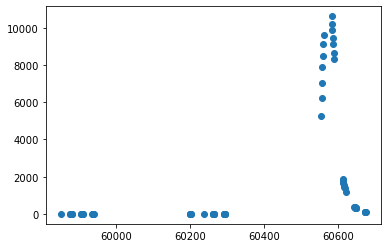

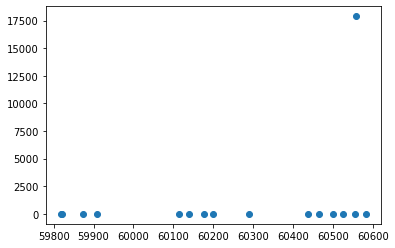

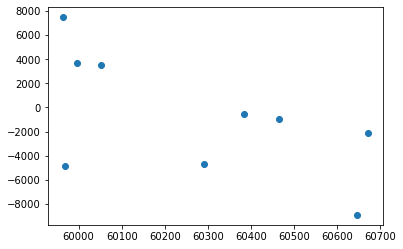

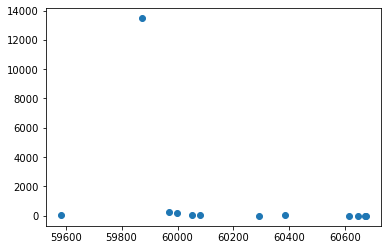

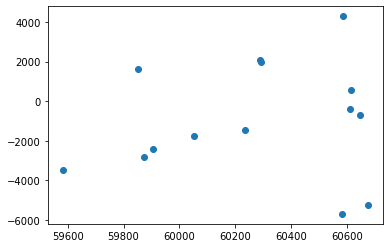

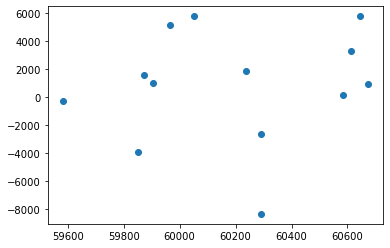

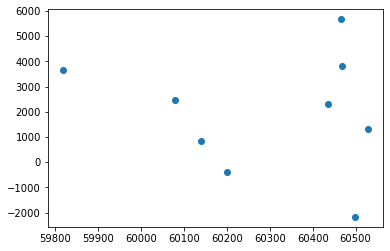

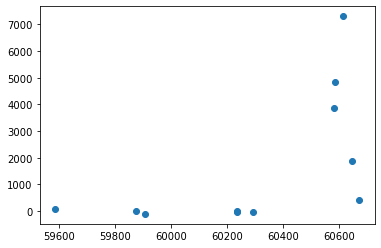

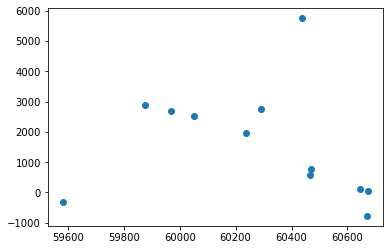

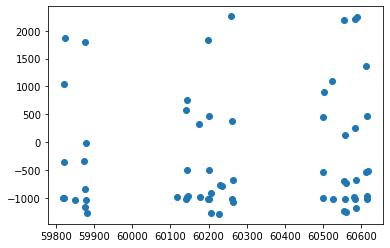

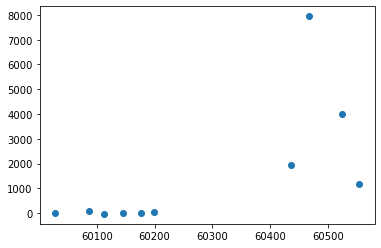

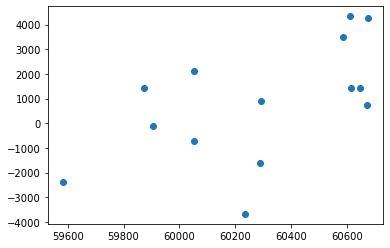

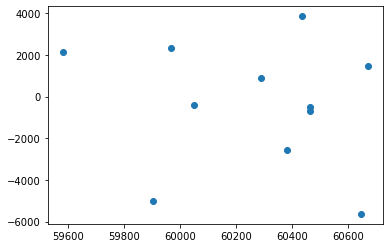

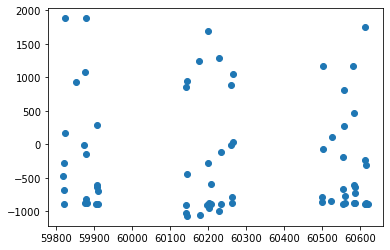

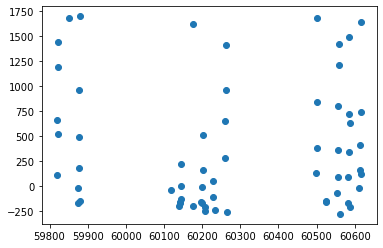

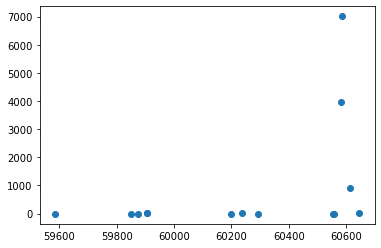

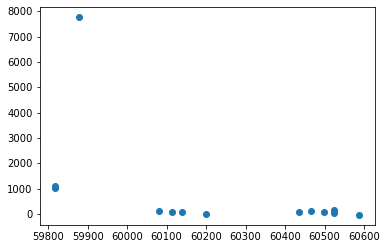

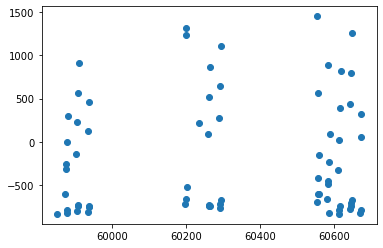

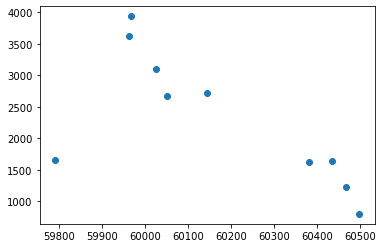

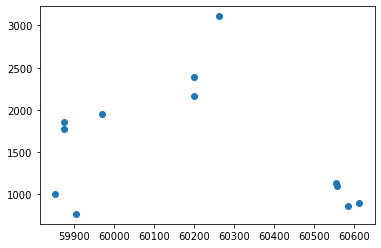

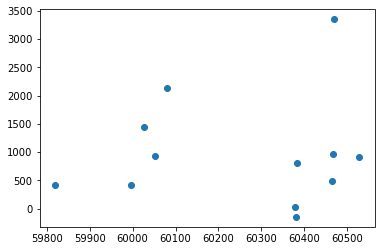

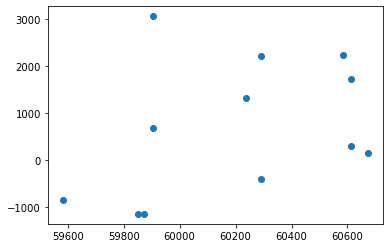

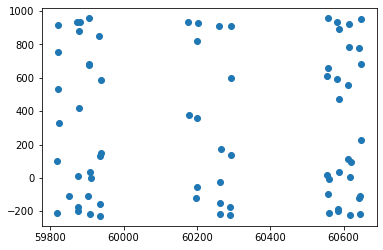

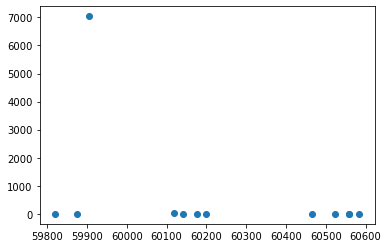

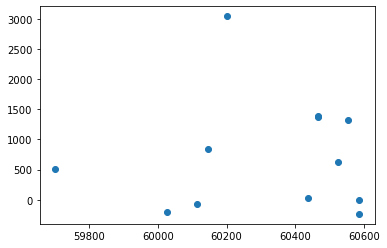

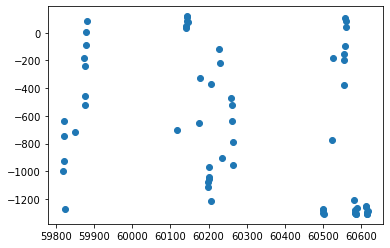

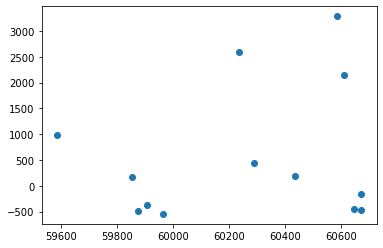

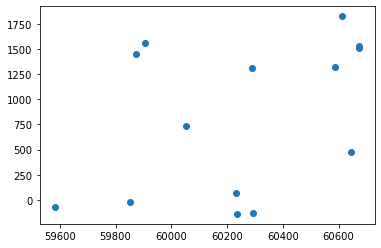

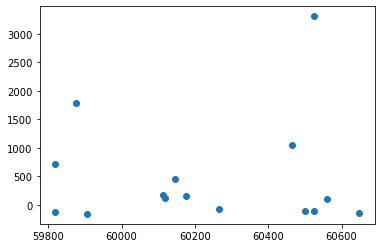

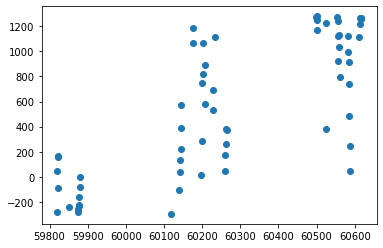

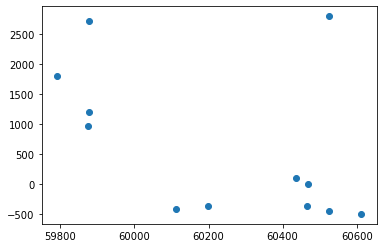

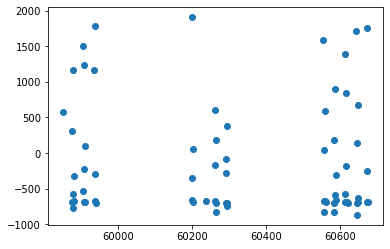

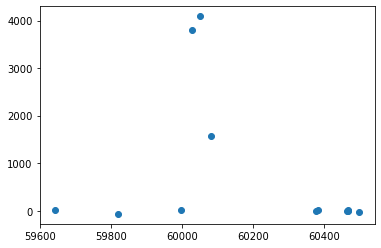

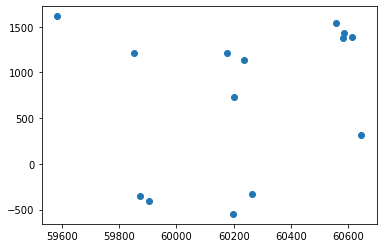

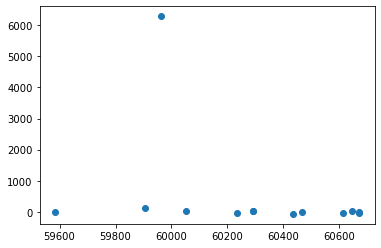

In [76]:
for rank in range(1, 50):
    object_id = rank_to_object_id(-rank, wd_neg_score, idx_id_wd_neg)
    lc = u_lcs[f"{object_id}"]
    mjd = u_mjds[f"{object_id}"]
    plt.scatter(mjd, lc)
    plt.show()
    # print(np.nanmean(lc))
    # print(meta_data.loc[object_id, ["target", "true_target"]])

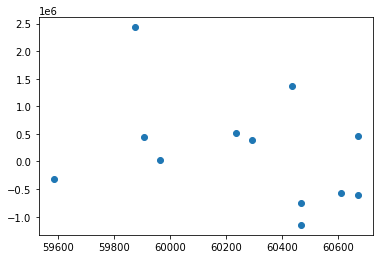

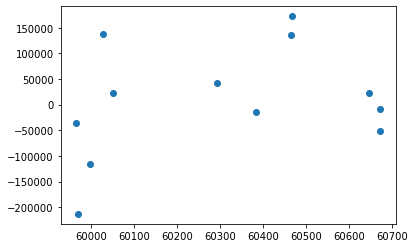

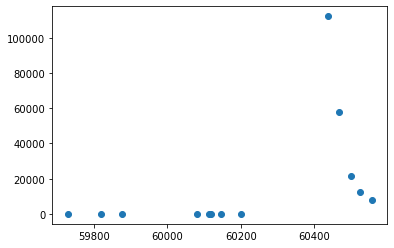

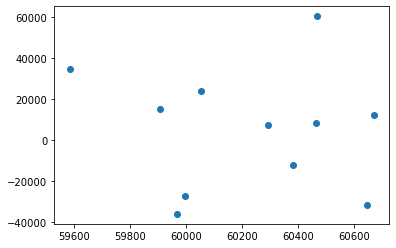

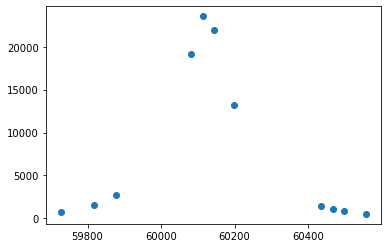

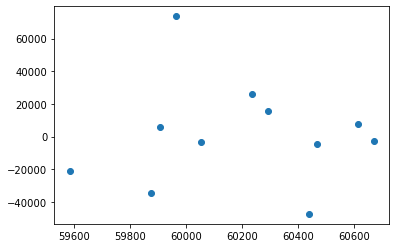

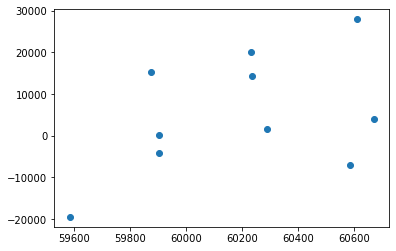

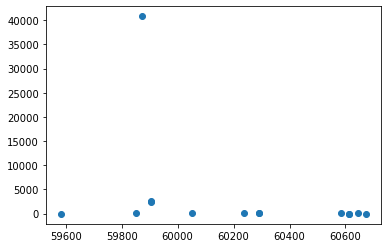

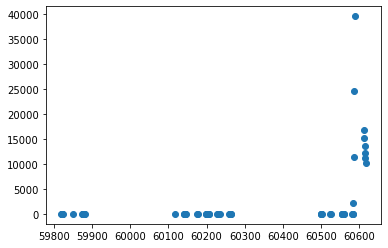

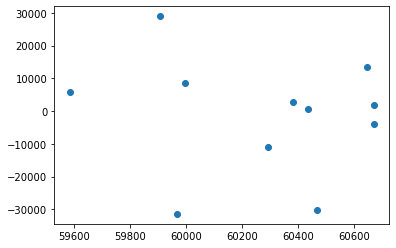

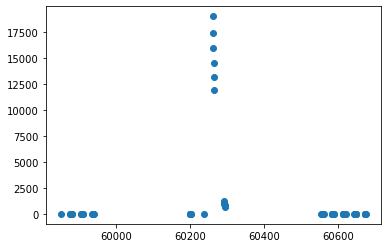

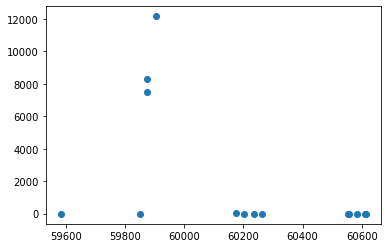

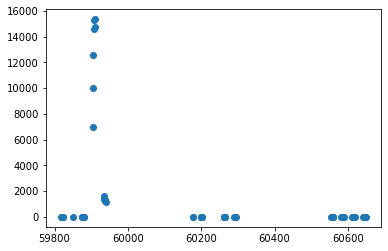

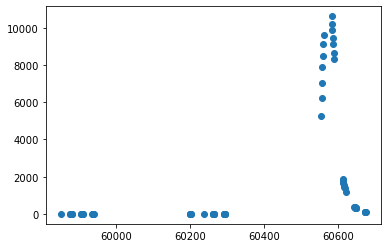

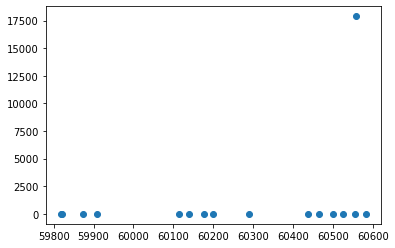

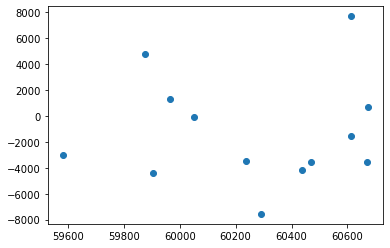

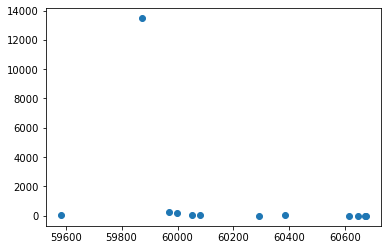

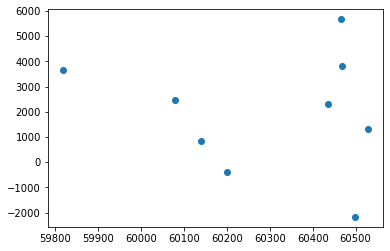

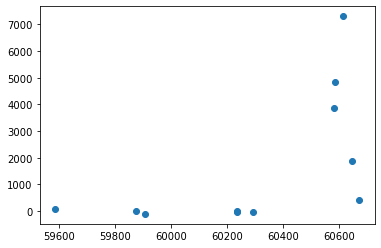

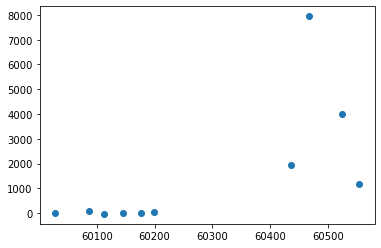

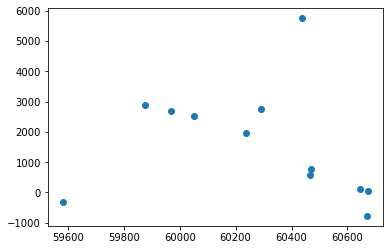

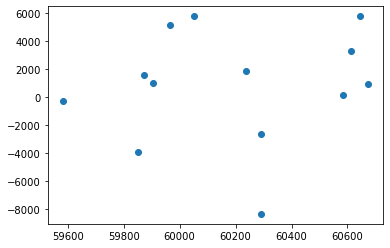

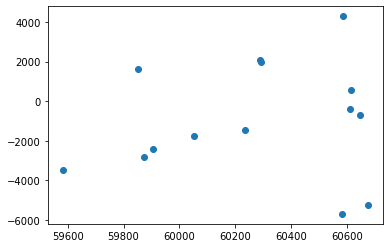

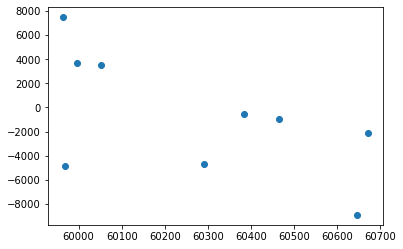

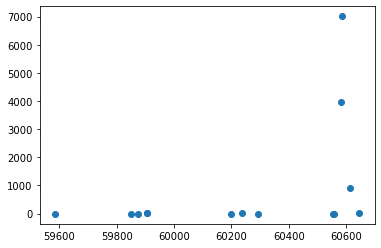

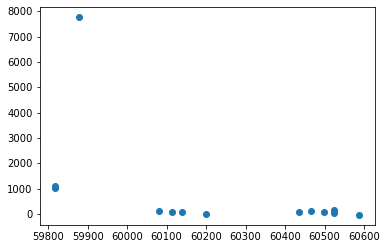

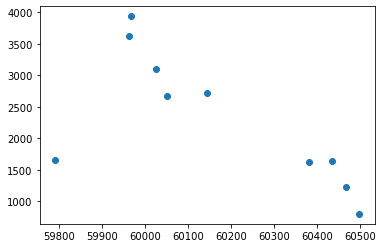

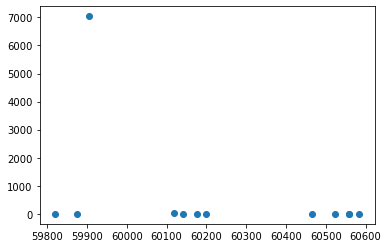

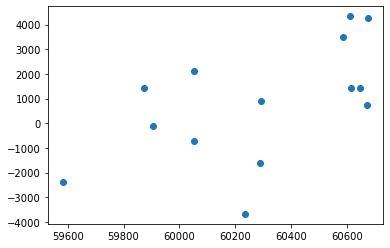

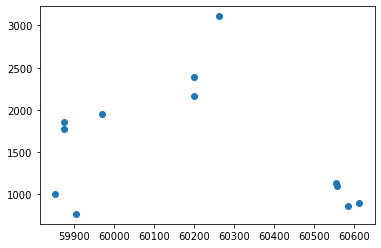

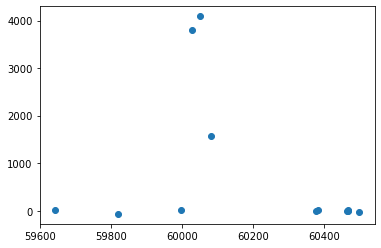

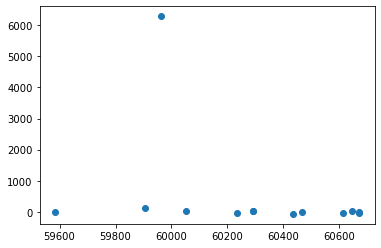

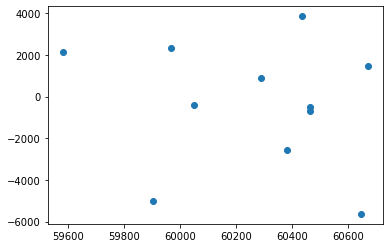

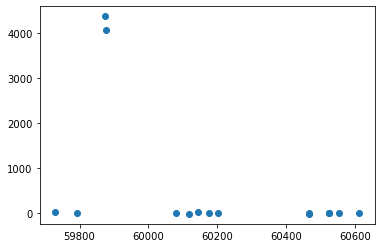

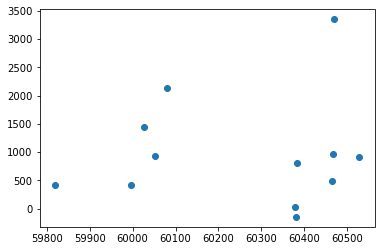

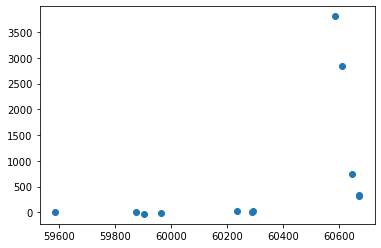

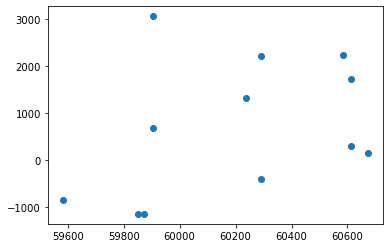

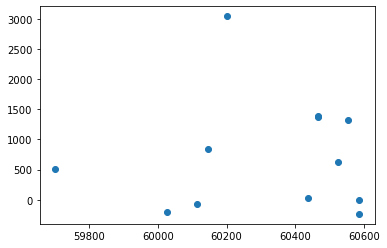

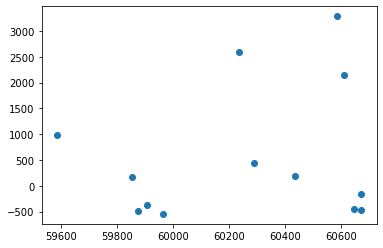

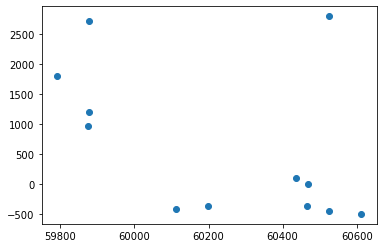

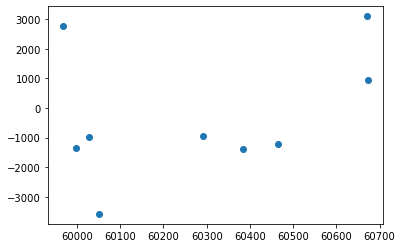

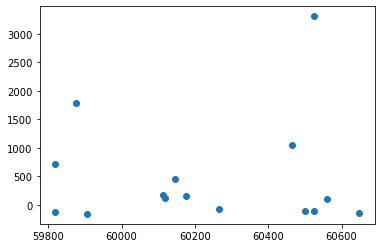

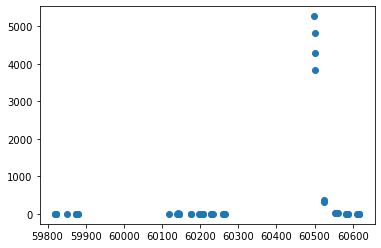

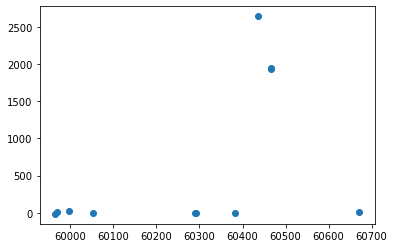

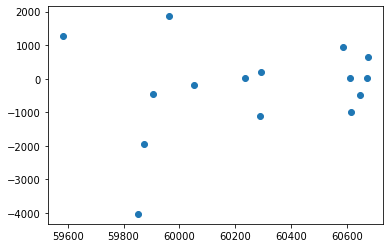

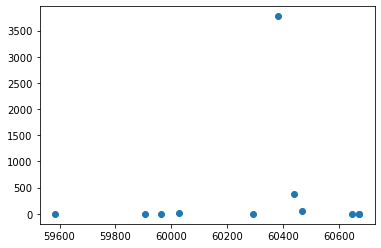

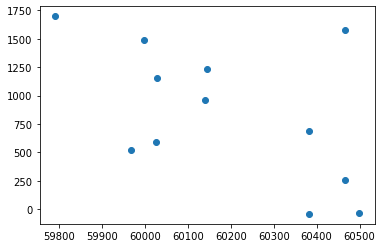

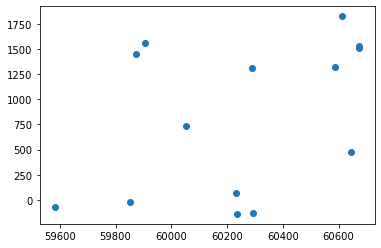

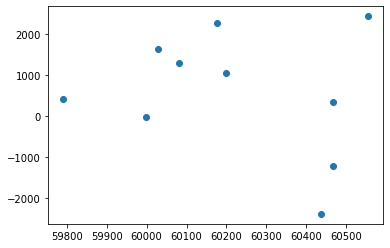

In [73]:
for rank in range(1, 50):
    object_id = rank_to_object_id(-rank, bd_neg_score, idx_id_bd_neg)
    lc = u_lcs[f"{object_id}"]
    mjd = u_mjds[f"{object_id}"]
    plt.scatter(mjd, lc)
    plt.show()
    # print(np.nanmean(lc))
    # print(meta_data.loc[object_id, ["target", "true_target"]])